<a href="https://colab.research.google.com/github/carolinegyireh/Lung_Cancer_Prediction/blob/main/lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.svm import SVC
from collections import Counter
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
warnings.simplefilter(action='ignore', category=UserWarning)

In [56]:
df=pd.read_csv("/content/lung_cancer_prediction_dataset.csv")
df.head()

,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [57]:
df.size

5295168

In [58]:
df.shape

(220632, 24)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 non-null  int64  
 13 

In [60]:
df.Lung_Cancer_Diagnosis.value_counts()

,count
Lung_Cancer_Diagnosis,
No,211671
Yes,8961


In [61]:
df.describe()

,ID,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
count,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000
mean,110315.500000,229.779882,52.518352,8.175274,7.007515,0.223526,63931.086928,1.502085,3.049802
std,63691.116633,349.247477,19.078215,12.377248,9.802187,1.231025,130690.126777,0.578043,14.924169
min,0.000000,54.000000,20.000000,0.000000,0.000000,0.000000,10005.000000,0.500000,0.000000
25%,55157.750000,83.000000,36.000000,0.000000,0.000000,0.000000,23000.000000,1.000000,0.000000
50%,110315.500000,113.000000,53.000000,0.000000,0.000000,0.000000,30000.000000,1.500000,0.000000
75%,165473.250000,206.000000,69.000000,15.000000,14.000000,0.000000,45000.000000,2.000000,0.000000
max,220631.000000,1400.000000,85.000000,40.000000,30.000000,10.000000,690000.000000,2.500000,90.000000


In [62]:
print(f'Missing Values: {df.isnull().sum().sum()}')
df.isnull().sum()

Missing Values: 425639


,0
ID,0
Country,0
Population_Size,0
Age,0
Gender,0
Smoker,0
Years_of_Smoking,0
Cigarettes_per_Day,0
Passive_Smoker,0
Family_History,0


In [63]:
# missing values as a percentage of the total rows
missing_percentage = (df.isnull().sum() / len(df))*100
print(f'missing values as percentage of the total: \n\n {missing_percentage[missing_percentage > 0]}')

missing values as percentage of the total: 

 Cancer_Stage      95.938486
Treatment_Type    96.979586
dtype: float64


In [64]:
# Fill numerical missing values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Check if any missing values remain
print("Missing Values After Filling:", df.isnull().sum().sum())


Missing Values After Filling: 0


In [65]:
df.duplicated().sum()

0

Outlier counts per column: 

ID: 0 outliers
Population_Size: 17659 outliers
Age: 0 outliers
Years_of_Smoking: 6660 outliers
Cigarettes_per_Day: 0 outliers
Survival_Years: 8961 outliers
Annual_Lung_Cancer_Deaths: 17676 outliers
Lung_Cancer_Prevalence_Rate: 0 outliers
Mortality_Rate: 8961 outliers




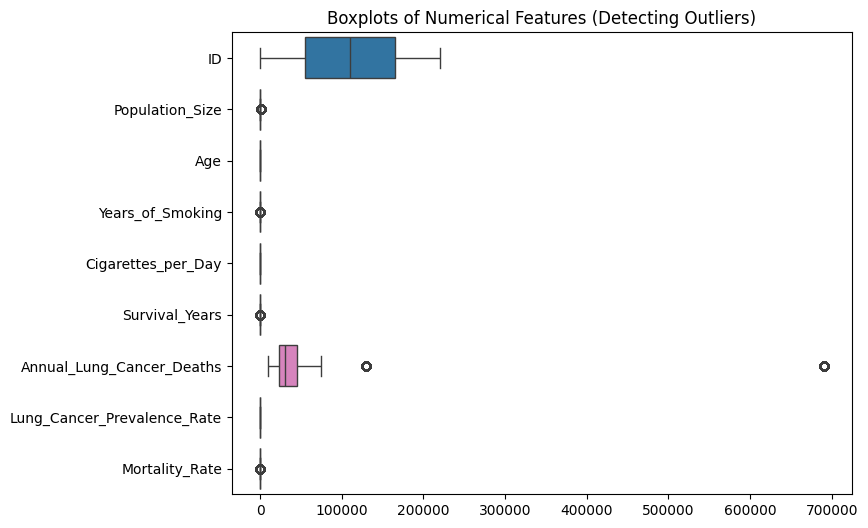

In [66]:
# Function to detect outliers using IQR
def detect_outliers(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

    return outlier_counts

# Get outlier counts per column
outliers_detected = detect_outliers(df)
print("Outlier counts per column: \n")
for col, count in outliers_detected.items():
    print(f"{col}: {count} outliers")
print('\n')

# Visualizing outliers with boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']), orient='h')
plt.title("Boxplots of Numerical Features (Detecting Outliers)")
plt.show()


In [67]:
# Function to cap outliers
def cap_outliers(df, columns, factor=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Apply capping to selected features
outlier_cols = ["Population_Size", "Years_of_Smoking", "Survival_Years", "Annual_Lung_Cancer_Deaths", "Mortality_Rate"]
cap_outliers(df, outlier_cols)

# Verify outliers after capping
outliers_after = detect_outliers(df)
print("Outlier counts after capping: \n", outliers_after)


Outlier counts after capping: 
 {'ID': 0, 'Population_Size': 0, 'Age': 0, 'Years_of_Smoking': 0, 'Cigarettes_per_Day': 0, 'Survival_Years': 0, 'Annual_Lung_Cancer_Deaths': 0, 'Lung_Cancer_Prevalence_Rate': 0, 'Mortality_Rate': 0}


In [68]:
columns_to_drop = ['ID', 'Country', 'Cancer_Stage', 'Treatment_Type', 'Developed_or_Developing', 'Population_Size', 'Annual_Lung_Cancer_Deaths', 'Survival_Years', 'Lung_Cancer_Prevalence_Rate', 'Mortality_Rate']

# Dropping the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Checking the updated dataframe
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     220632 non-null  int64  
 1   Gender                  220632 non-null  object 
 2   Smoker                  220632 non-null  object 
 3   Years_of_Smoking        220632 non-null  float64
 4   Cigarettes_per_Day      220632 non-null  int64  
 5   Passive_Smoker          220632 non-null  object 
 6   Family_History          220632 non-null  object 
 7   Lung_Cancer_Diagnosis   220632 non-null  object 
 8   Adenocarcinoma_Type     220632 non-null  object 
 9   Air_Pollution_Exposure  220632 non-null  object 
 10  Occupational_Exposure   220632 non-null  object 
 11  Indoor_Pollution        220632 non-null  object 
 12  Healthcare_Access       220632 non-null  object 
 13  Early_Detection         220632 non-null  object 
dtypes: float64(1), int64

In [70]:
df_cleaned.head()

,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection
0,80,Male,Yes,30.0,29,No,No,No,Yes,Low,Yes,No,Poor,No
1,53,Male,No,0.0,0,Yes,No,No,Yes,Low,Yes,No,Poor,No
2,47,Male,Yes,12.0,6,Yes,No,No,Yes,Medium,No,No,Poor,Yes
3,39,Female,No,0.0,0,No,Yes,No,Yes,Low,No,No,Poor,No
4,44,Female,No,0.0,0,Yes,No,No,Yes,Medium,Yes,No,Poor,No


In [71]:
# df['Adenocarcinoma_Type'].unique()

In [72]:
# List of binary categorical columns to encode (Yes/No type)
binary_columns = ['Gender', 'Smoker', 'Passive_Smoker', 'Family_History',
                  'Lung_Cancer_Diagnosis', 'Adenocarcinoma_Type']

# Apply Label Encoding
le = LabelEncoder()
for col in binary_columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# One-Hot Encode categorical features with multiple categories
df_cleaned = pd.get_dummies(df_cleaned, columns=['Air_Pollution_Exposure', 'Occupational_Exposure',
                                                 'Indoor_Pollution', 'Healthcare_Access', 'Early_Detection'], drop_first=True)


In [73]:
df_cleaned.head()

,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Adenocarcinoma_Type,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_Yes,Indoor_Pollution_Yes,Healthcare_Access_Poor,Early_Detection_Yes
0,80,1,1,30.0,29,0,0,0,1,True,False,True,False,True,False
1,53,1,0,0.0,0,1,0,0,1,True,False,True,False,True,False
2,47,1,1,12.0,6,1,0,0,1,False,True,False,False,True,True
3,39,0,0,0.0,0,0,1,0,1,True,False,False,False,True,False
4,44,0,0,0.0,0,1,0,0,1,False,True,True,False,True,False


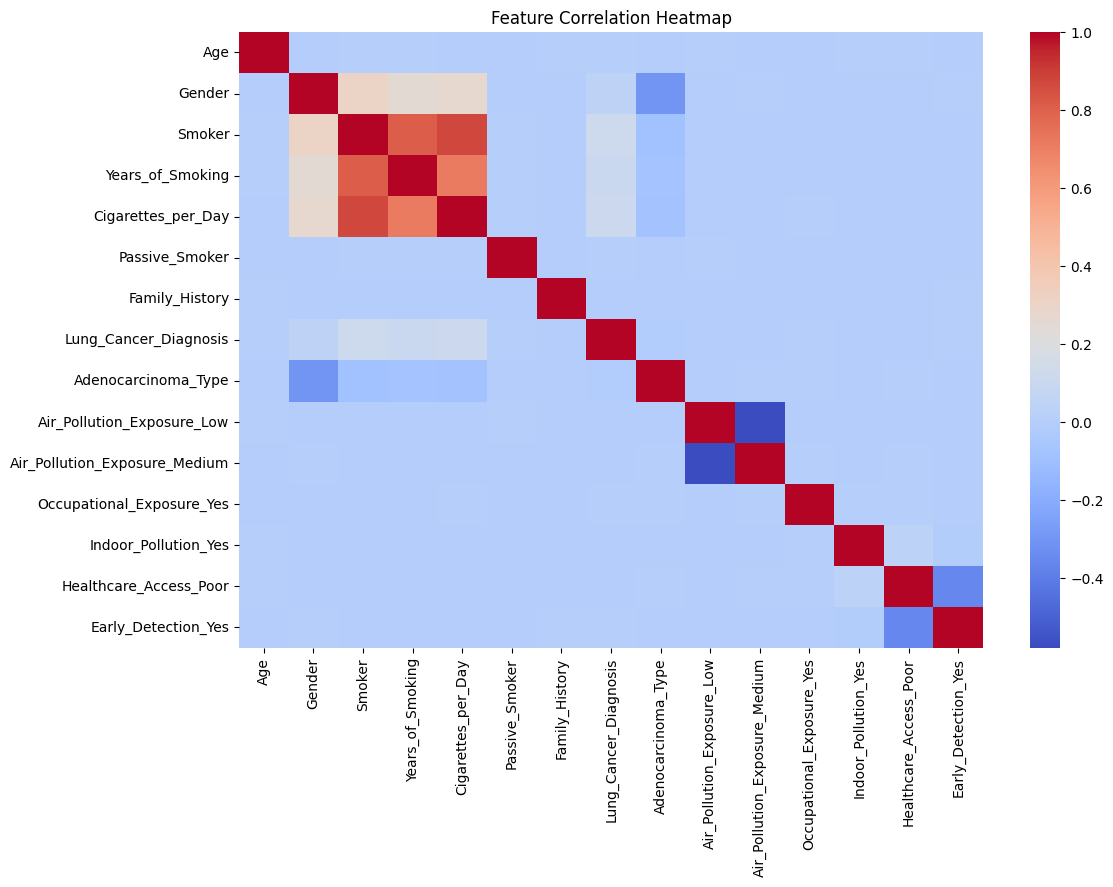

In [74]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [75]:
df_cleaned.corr()

,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Adenocarcinoma_Type,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_Yes,Indoor_Pollution_Yes,Healthcare_Access_Poor,Early_Detection_Yes
Age,1.000000,-0.000528,0.002376,0.002092,0.001196,-0.000087,0.002228,0.001578,-0.000274,0.002364,-0.000316,-0.001637,0.002284,0.001725,0.000726
Gender,-0.000528,1.000000,0.306838,0.249197,0.268256,0.000484,0.001123,0.039423,-0.301319,-0.001262,0.002255,0.000047,-0.002703,-0.002287,0.002153
Smoker,0.002376,0.306838,1.000000,0.811094,0.874835,0.003472,-0.000263,0.124698,-0.089586,-0.000639,-0.001366,0.000254,-0.002053,-0.000180,0.001293
Years_of_Smoking,0.002092,0.249197,0.811094,1.000000,0.710584,0.003626,-0.001287,0.101115,-0.072757,-0.000519,-0.001316,-0.000193,-0.002023,-0.001831,0.001045
Cigarettes_per_Day,0.001196,0.268256,0.874835,0.710584,1.000000,0.002164,-0.001010,0.109157,-0.080056,0.000398,-0.002340,0.001458,-0.001013,0.000165,0.001133
Passive_Smoker,-0.000087,0.000484,0.003472,0.003626,0.002164,1.000000,0.000817,0.002806,0.000810,0.001507,-0.002484,-0.000744,0.000862,-0.002669,0.000418
Family_History,0.002228,0.001123,-0.000263,-0.001287,-0.001010,0.000817,1.000000,-0.002013,-0.002260,0.000666,-0.002900,-0.001310,-0.003219,0.001097,0.002486
Lung_Cancer_Diagnosis,0.001578,0.039423,0.124698,0.101115,0.109157,0.002806,-0.002013,1.000000,-0.011948,-0.001310,0.001100,0.003222,-0.002227,-0.001856,0.001804
Adenocarcinoma_Type,-0.000274,-0.301319,-0.089586,-0.072757,-0.080056,0.000810,-0.002260,-0.011948,1.000000,-0.000536,0.002080,0.002014,0.000538,0.001611,-0.001540
Air_Pollution_Exposure_Low,0.002364,-0.001262,-0.000639,-0.000519,0.000398,0.001507,0.000666,-0.001310,-0.000536,1.000000,-0.577975,0.000222,0.000482,-0.000392,0.000927


In [76]:
# Selecting only numerical columns to scale
num_cols = ['Age', 'Years_of_Smoking', 'Cigarettes_per_Day']

scaler = StandardScaler()
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])


In [77]:
# Defining target and features
X = df_cleaned.drop(columns=['Lung_Cancer_Diagnosis'])  # Features
y = df_cleaned['Lung_Cancer_Diagnosis']  # Target


In [78]:
from imblearn.combine import SMOTEENN
# Initialize SMOTE + Edited Nearest Neighbors (ENN)
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Check new class distribution
print("Class distribution after SMOTEENN: \n", Counter(y_resampled))



Class distribution after SMOTEENN: 
 Counter({0: 174258, 1: 174139})


In [79]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

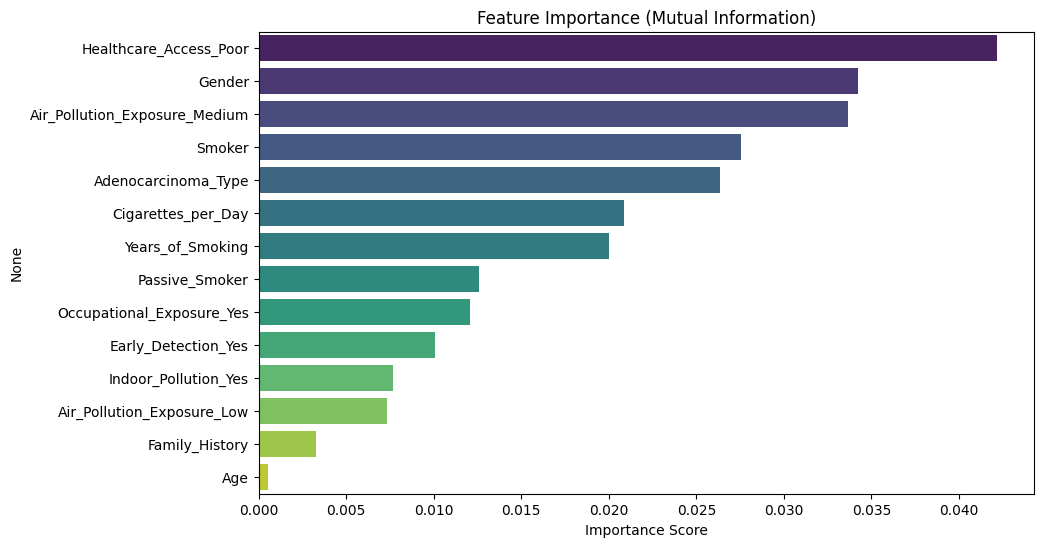

In [84]:
# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_scores.values, y=mi_scores.index, palette='viridis', hue=mi_scores.index)
plt.title("Feature Importance (Mutual Information)")
plt.xlabel("Importance Score")
plt.show()

In [90]:
# Logistic Regression (already done)
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_pred = logreg_model.predict(X_test)
logreg_pred_probs = logreg_model.predict_proba(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_probs = rf_model.predict_proba(X_test)


# XGB Model Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred_probs = xgb_model.predict_proba(X_test)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_pred_probs = knn_model.predict_proba(X_test)

# Print Evaluation Metrics for All Models
models = ['Logistic Regression', 'Random Forest', 'XGB', 'KNN']
predictions = [logreg_pred, rf_pred, xgb_pred, knn_pred]

for model_name, pred in zip(models, predictions):
    print(f"\n{model_name}:\n")
    print(f"Accuracy: {accuracy_score(y_test, pred):.2f}")
    print(f"Precision: {precision_score(y_test, pred):.2f}")
    print(f"Recall: {recall_score(y_test, pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, pred):.2f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, pred):.2f}")
    print(f"Log Loss: {log_loss(y_test, pred):.2f}")
    print(f"Classification Report:\n{classification_report(y_test, pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred)}, \n")



Logistic Regression:

Accuracy: 0.73
Precision: 0.71
Recall: 0.78
F1-Score: 0.75
ROC-AUC: 0.73
Log Loss: 9.57
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72     34979
           1       0.71      0.78      0.75     34701

    accuracy                           0.73     69680
   macro avg       0.74      0.73      0.73     69680
weighted avg       0.74      0.73      0.73     69680

Confusion Matrix:
[[23975 11004]
 [ 7500 27201]], 


Random Forest:

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
ROC-AUC: 0.97
Log Loss: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     34979
           1       0.97      0.97      0.97     34701

    accuracy                           0.97     69680
   macro avg       0.97      0.97      0.97     69680
weighted avg       0.97      0.97      0.97     69680

Confusion Matrix:
[[34044   935]

In [86]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, linewidths=2, linecolor='white')

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

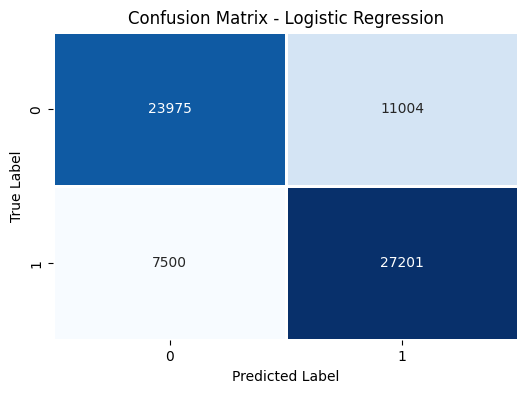

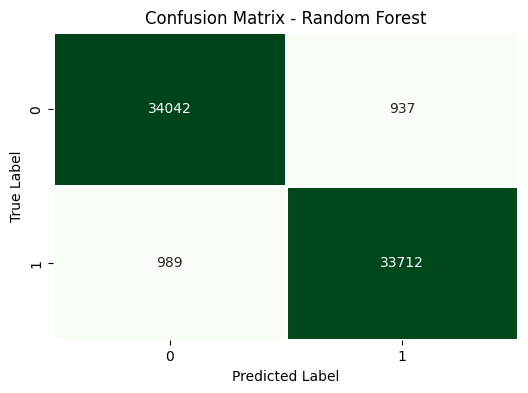

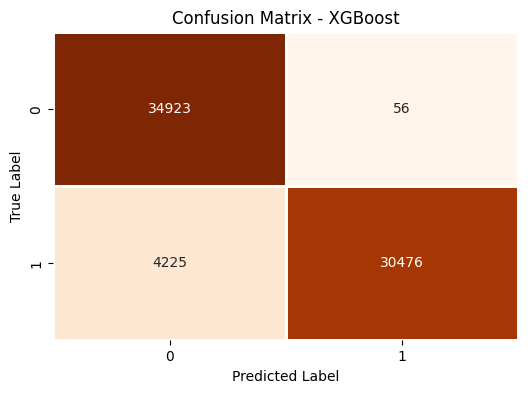

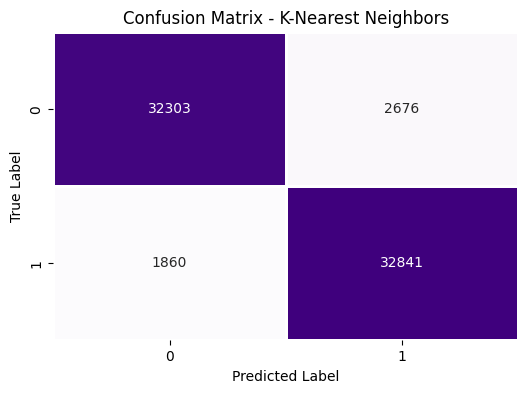

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix with different colors
def plot_confusion_matrix(y_true, y_pred, model_name, cmap):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    print('\n\n')
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False, linewidths=2, linecolor='white')

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Color maps for each model
color_maps = {
    "Logistic Regression": "Blues",
    "Random Forest": "Greens",
    "XGBoost": "Oranges",
    "K-Nearest Neighbors": "Purples"
}

# Plot confusion matrices with different colors
plot_confusion_matrix(y_test, logreg_pred, "Logistic Regression", color_maps["Logistic Regression"])
plot_confusion_matrix(y_test, rf_pred, "Random Forest", color_maps["Random Forest"])
plot_confusion_matrix(y_test, xgb_pred, "XGBoost", color_maps["XGBoost"])
plot_confusion_matrix(y_test, knn_pred, "K-Nearest Neighbors", color_maps["K-Nearest Neighbors"])


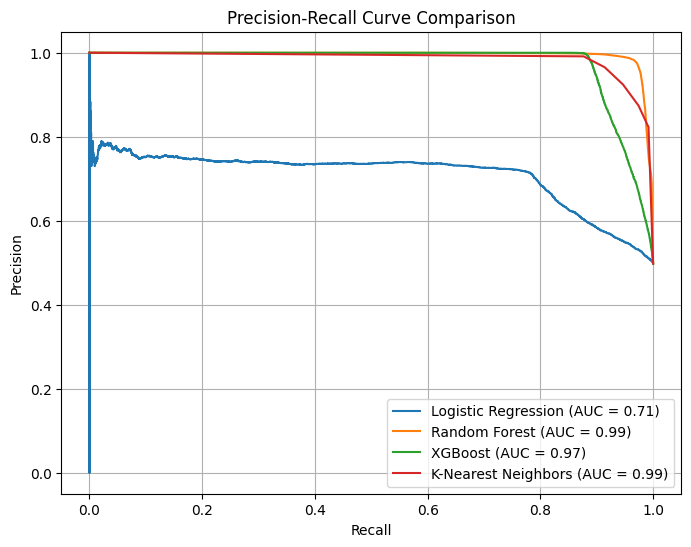

In [91]:
# Define function to plot PR curves
def plot_precision_recall_curve(y_true, y_preds, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_preds)
    auc_score = auc(recall, precision)

    plt.plot(recall, precision, label=f"{model_name} (AUC = {auc_score:.2f})")

# Plot Precision-Recall Curves for all models
plt.figure(figsize=(8, 6))

plot_precision_recall_curve(y_test, logreg_pred_probs[:, 1], "Logistic Regression")
plot_precision_recall_curve(y_test, rf_pred_probs[:, 1], "Random Forest")
plot_precision_recall_curve(y_test, xgb_pred_probs[:, 1], "XGBoost")
plot_precision_recall_curve(y_test, knn_pred_probs[:, 1], "K-Nearest Neighbors")

# Formatting the plot
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid()
plt.show()


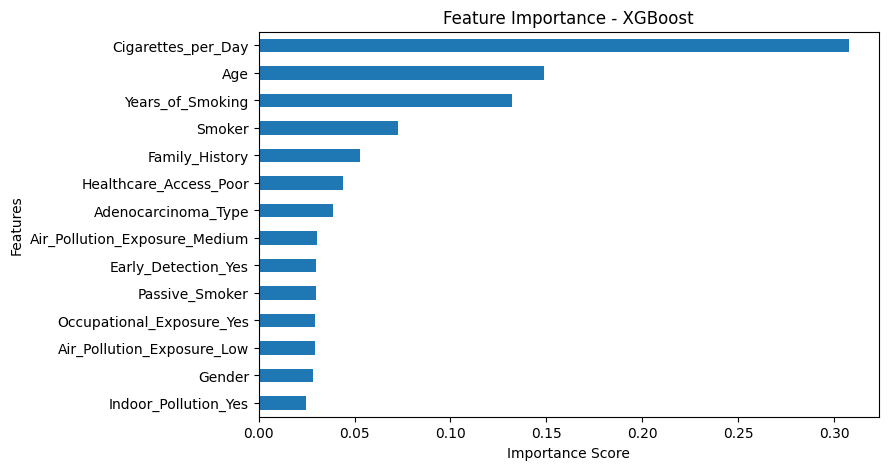

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance for XGBoost
xgb_importance = xgb_model.feature_importances_
feature_names = X_train.columns

# Plot
plt.figure(figsize=(8, 5))
pd.Series(xgb_importance, index=feature_names).sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - XGBoost")
plt.show()


In [92]:
import joblib

# Save Random Forest
joblib.dump(rf_model, "random_forest_model.pkl")
# Save XGBoost
joblib.dump(xgb_model, "xgboost_model.pkl")


['xgboost_model.pkl']

In [93]:
# Load Random Forest
rf_model = joblib.load("random_forest_model.pkl")
# Load XGBoost
xgb_model = joblib.load("xgboost_model.pkl")
